<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/main/Stock_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import missingno as mn
from pandas_datareader import data as pdr
import numpy as np

In [3]:
def circuit_status(data):
  if data['Open'] == data['Close'] == data['High'] == data['Low']:
    return 1
  else:
    return 0

In [4]:
import datetime
def upper_circuit_checker(dates):
  c_data = pdr.get_data_yahoo('OBCL.NS', start=dates, end = dates + datetime.timedelta(days=1),interval='1h')
  c_data = c_data.assign(circuit=c_data.apply(circuit_status, axis=1))
  if c_data.circuit.sum():
    return 1
  else:
    return 0

In [5]:
def lower_circuit_checker(dates):
  c_data = pdr.get_data_yahoo('OBCL.NS', start=dates, end = dates + datetime.timedelta(days=1),interval='1h')
  c_data = c_data.assign(circuit=c_data.apply(circuit_status, axis=1))
  if c_data.circuit.sum():
    return -1
  else:
    return 0

In [6]:
def find_circuits(data):
  # adding a column which show the maximum change of price in that day.
  a=np.zeros((len(data),1))
  b=np.zeros((len(data),1)) 
  a[0] = ((data['High'][0] - data['Open'][0] )/(data['Close'][0]))*100
  b[0] = ((data['Open'][0] - data['Low'][0] )/(data['Close'][0]))*100
  for i in range(1,len(data)):
    a[i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 
    b[i] = ((data['Close'][i-1] - data['Low'][i] )/(data['Close'][i-1]))*100
  data['high_preclose%'] = a
  data['low_preclose%'] = b

  # adding a column to set which show if circuit is there or not
  data['upper_possible_circuit'] = np.where(data['high_preclose%'] >= 4.6, 1, 0)
  data['lower_possible_circuit'] = np.where(data['low_preclose%'] >= 4.6, 1, 0)

  # for date in data.query('possible_circuit == 1').index:
  for i in range(len(data)):
    if data['upper_possible_circuit'][i] == 1:
      a[i] = upper_circuit_checker(data.index[i])
    elif data['lower_possible_circuit'][i] == 1:
      a[i] = lower_circuit_checker(data.index[i])
    else:
      a[i] = 0
  data['circuit'] = a

  # printing Dates when the circuit has happened
  print('Dates on which there is upper circuits')
  for date in data.query('circuit == 1').index:
    print('--->',date)
  print('Dates on which there is lower circuits')
  for date in data.query('circuit == -1').index:
    print('--->',date)

  plt.figure(figsize=(13,3))
  plt.plot(data['Close'])
  # plt.scatter(data.query('possible_circuit == 1').index, data.query('possible_circuit == 1')['Close'], color='Blue')
  plt.scatter(data.query('circuit == 1').index, data.query('circuit == 1')['Close'], color='Green')
  plt.scatter(data.query('circuit == -1').index, data.query('circuit == -1')['Close'], color='Red')
  plt.show()

  return data

In [24]:
yf.pdr_override()
Min_data = pdr.get_data_yahoo('SALASAR.NS', start='2023-01-01', end='2023-04-30',interval="1d")
Min_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,51.950001,54.250000,51.950001,53.849998,53.849998,2226997
2023-01-03,54.049999,55.250000,52.150002,52.799999,52.799999,1353288
2023-01-04,52.049999,53.349998,50.200001,50.500000,50.500000,2050914
2023-01-05,50.900002,51.500000,48.849998,49.900002,49.900002,595092
2023-01-06,50.000000,50.250000,48.099998,48.950001,48.950001,510870
...,...,...,...,...,...,...
2023-04-24,42.299999,42.950001,41.549999,42.400002,42.400002,767992
2023-04-25,42.650002,42.950001,41.349998,41.450001,41.450001,629542
2023-04-26,41.849998,41.849998,39.349998,40.400002,40.400002,496596


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

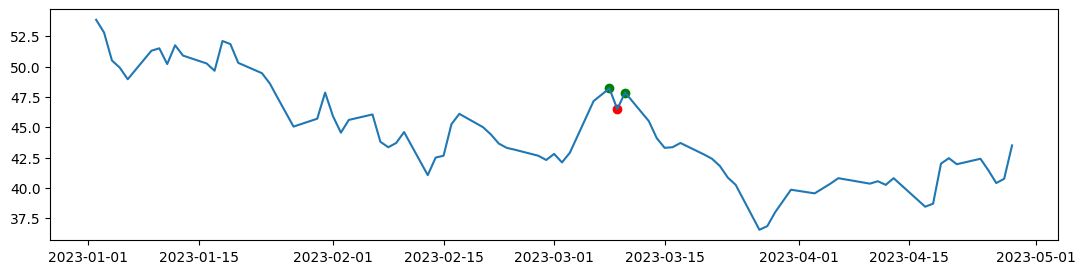

In [25]:
data = find_circuits(Min_data)
# print(data)

In [26]:
data

,Open,High,Low,Close,Adj Close,Volume,high_preclose%,low_preclose%,upper_possible_circuit,lower_possible_circuit,circuit
Date,,,,,,,,,,,
2023-01-02,51.950001,54.250000,51.950001,53.849998,53.849998,2226997,4.271122,0.000000,0,0,0.0
2023-01-03,54.049999,55.250000,52.150002,52.799999,52.799999,1353288,2.599817,3.156912,0,0,0.0
2023-01-04,52.049999,53.349998,50.200001,50.500000,50.500000,2050914,1.041665,4.924240,0,1,0.0
2023-01-05,50.900002,51.500000,48.849998,49.900002,49.900002,595092,1.980198,3.267330,0,0,0.0
2023-01-06,50.000000,50.250000,48.099998,48.950001,48.950001,510870,0.701400,3.607220,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,42.299999,42.950001,41.549999,42.400002,42.400002,767992,2.383790,0.953520,0,0,0.0
2023-04-25,42.650002,42.950001,41.349998,41.450001,41.450001,629542,1.297168,2.476422,0,0,0.0
2023-04-26,41.849998,41.849998,39.349998,40.400002,40.400002,496596,0.965013,5.066350,0,1,0.0


In [27]:
sensex = pdr.get_data_yahoo('^BSESN', start='2023-01-01', end='2023-04-30',interval="1d")
nifty50 = pdr.get_data_yahoo('^NSEI', start='2023-01-01', end='2023-04-30',interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
sensex

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,60871.238281,61222.789062,60764.628906,61167.789062,61167.789062,18500
2023-01-03,61074.878906,61343.960938,61004.039062,61294.199219,61294.199219,6700
2023-01-04,61294.648438,61327.210938,60593.558594,60657.449219,60657.449219,7900
2023-01-05,60847.500000,60877.058594,60049.839844,60353.269531,60353.269531,8900
2023-01-06,60388.738281,60537.628906,59669.910156,59900.371094,59900.371094,8600
...,...,...,...,...,...,...
2023-04-24,59873.710938,60101.640625,59620.109375,60056.101562,60056.101562,6600
2023-04-25,60202.769531,60268.671875,59967.019531,60130.710938,60130.710938,6500
2023-04-26,60087.980469,60362.789062,59954.910156,60300.578125,60300.578125,4500


In [23]:
nifty50

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200
...,...,...,...,...,...,...
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000


In [28]:
#Financial of Salasar company
fin_sal = pd.read_csv('https://raw.githubusercontent.com/shreya139/Circuits-in-Stocks/main/DATASET_61/yearly_fin_salasar_MP.csv')

In [29]:
fin_sal = fin_sal.dropna()
fin_sal.isna().sum()
fin_sal

,Salasar Techno Engineering,Previous Years »,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
8,Net Sales/Income from operations,690.9,583.31,525.51,654.32,477.29
9,Other Operating Income,--,--,--,--,--
10,Total Income From Operations,690.9,583.31,525.51,654.32,477.29
12,Consumption of Raw Materials,571.5,--,397.58,--,347.79
13,Purchase of Traded Goods,--,--,--,--,--
14,Increase/Decrease in Stocks,-22.46,-13.65,17.51,-8.04,-17.88
15,Power & Fuel,--,--,--,--,--
16,Employees Cost,38.01,30.57,31.03,28.03,15.02
17,Depreciation,7.1,5.61,4.99,4.6,1.56
18,Excise Duty,--,--,--,--,--


In [32]:
df = fin_sal.reset_index()
# df.head()
#Renaming columns 
df.rename(columns = {'Previous Years »':"mar'22" , "Unnamed: 2" : "mar'21" ,"Unnamed: 3":"mar'20","Unnamed: 4":"mar'19" , "Unnamed: 5":"mar'18" }, inplace = True)
df.head()

,index,Salasar Techno Engineering,mar'22,mar'21,mar'20,mar'19,mar'18
0,8,Net Sales/Income from operations,690.9,583.31,525.51,654.32,477.29
1,9,Other Operating Income,--,--,--,--,--
2,10,Total Income From Operations,690.9,583.31,525.51,654.32,477.29
3,12,Consumption of Raw Materials,571.5,--,397.58,--,347.79
4,13,Purchase of Traded Goods,--,--,--,--,--


In [33]:
net_income = float(df.loc[26][2]) * 10**7
net_income

318100000.0

In [34]:
# For outstanding share 
facevalue = 10
outstanding_shr = (float(df.loc[27][2]) * 10**7) / facevalue
outstanding_shr

28570000.0

In [35]:
# Calculate earnings per share
EPS = net_income / outstanding_shr
EPS

11.134056702835142

In [36]:
market_price = data['Close']
PE = market_price / EPS
PE = pd.DataFrame(PE)
PE.rename(columns = {"Close":"PE" }, inplace = True)
PE

,PE
Date,
2023-01-02,4.836512
2023-01-03,4.742207
2023-01-04,4.535633
2023-01-05,4.481745
2023-01-06,4.396421
...,...
2023-04-24,3.808136
2023-04-25,3.722812
2023-04-26,3.628507


In [57]:
model_dataset[['stock_close','circuit']] = data[['Close','circuit']].copy()
model_dataset[['stock_PE']] = PE[['PE']]
model_dataset[['nifty50']] = nifty50[['Close']]
model_dataset[['sensex']] = sensex[['Close']]

In [58]:
model_dataset

,stock_close,circuit,stock_PE,nifty50,sensex
Date,,,,,
2023-01-02,53.849998,0.0,4.836512,18197.449219,61167.789062
2023-01-03,52.799999,0.0,4.742207,18232.550781,61294.199219
2023-01-04,50.500000,0.0,4.535633,18042.949219,60657.449219
2023-01-05,49.900002,0.0,4.481745,17992.150391,60353.269531
2023-01-06,48.950001,0.0,4.396421,17859.449219,59900.371094
...,...,...,...,...,...
2023-04-24,42.400002,0.0,3.808136,17743.400391,60056.101562
2023-04-25,41.450001,0.0,3.722812,17769.250000,60130.710938
2023-04-26,40.400002,0.0,3.628507,17813.599609,60300.578125


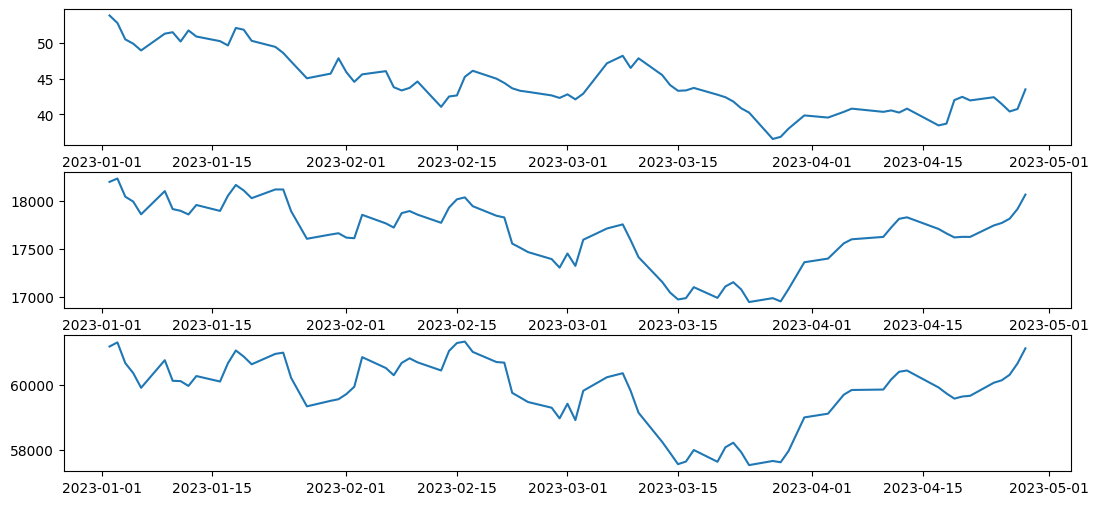

In [70]:
plt.figure(figsize=(13,6))
plt.subplot(3,1,1)
plt.plot(model_dataset['stock_close'])
plt.subplot(3,1,2)
plt.plot(model_dataset['nifty50'])
plt.subplot(3,1,3)
plt.plot(model_dataset['sensex'])